In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import datetime as dt
from pandas.core.common import flatten
import matplotlib.pyplot as plt





In [25]:
data = pd.read_csv("cluster4zhvi.csv", index_col="City")
data.drop(data.columns[0], axis=1, inplace=True)

In [3]:
data_t = data.transpose().copy()


Text(0.5, 0, 'Date')

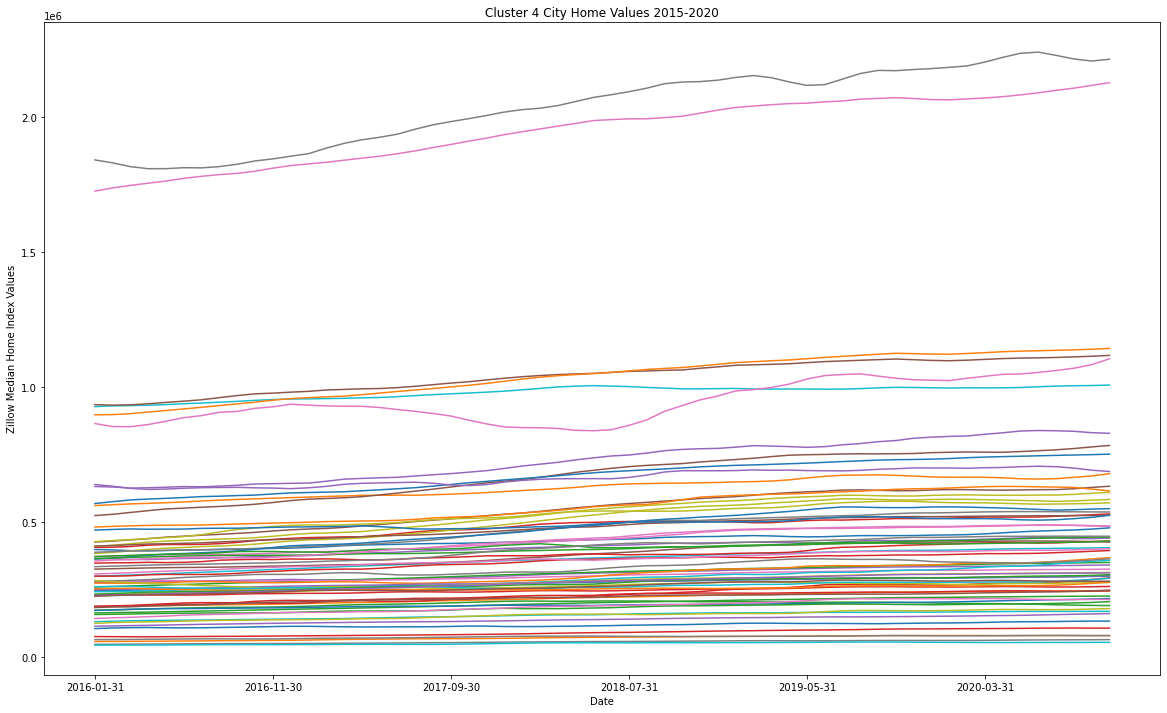

In [4]:
data_t.plot(kind='line', figsize=(20, 12), legend=None) # pass a tuple (x, y) size



plt.title('Cluster 4 City Home Values 2015-2020')
plt.ylabel('Zillow Median Home Index Values')
plt.xlabel('Date')
#plt.savefig('Images/Cluster4.png')

In [26]:
dates = data.stack()
dates.name = 'date'
xx = dates.reset_index()

d = {'city': xx.iloc[:,0].values, 'date': xx.iloc[:,1].values, 'price': xx.iloc[:,2].values}
data2 = pd.DataFrame(data=d)

data2.head()



,city,date,price
0,Montrose,2016-01-31,245491.0
1,Montrose,2016-02-29,246607.0
2,Montrose,2016-03-31,247718.0
3,Montrose,2016-04-30,248871.0
4,Montrose,2016-05-31,250000.0


In [27]:
# convert datetime to numeric for linear regression to work
dates_org = data2['date']
data2["date_org"] = dates_org
data2['date'] = pd.to_datetime(data2['date'])
data2['date'] = data2['date'].map(dt.datetime.toordinal)

cities = data2.city.unique()

In [7]:
cities

array(['Montrose', 'Steamboat Springs', 'Fort Morgan', 'Glenwood Springs',
       'Pagosa Springs', 'Breckenridge', 'Aspen', 'Vail', 'Silverthorne',
       'Salida', 'Edwards', 'Leadville', 'Buena Vista', 'New Castle',
       'Avon', 'Granby', 'Mancos', 'Las Animas', 'Keystone', 'Palisade',
       'Crested Butte', 'Whitewater', 'Rangely', 'Mack', 'Wolcott',
       'Frisco', 'Grand Lake', 'Winter Park', 'Ophir', 'Snowmass Village',
       'Crestone', 'Julesburg', 'Wetmore', 'Sawpit', 'South Fork',
       'Redstone', 'Mount Crested Butte', 'Cokedale', 'Pleasant View',
       'Ovid', 'Dillon', 'Tabernash', 'Marble', 'Norwood', 'Minturn',
       'Mountain Village', 'Red Cliff', 'Glade Park', 'Silverton',
       'Peetz', 'Clark', 'Telluride', 'Ouray', 'Ohio City', 'Hillrose',
       'Pitkin', 'Joes', 'Fraser', 'Kirk', 'Phippsburg', 'Cahone',
       'Yampa', 'Parlin', 'Log Lane Village', 'Poncha Springs', 'Rico',
       'Woody Creek'], dtype=object)

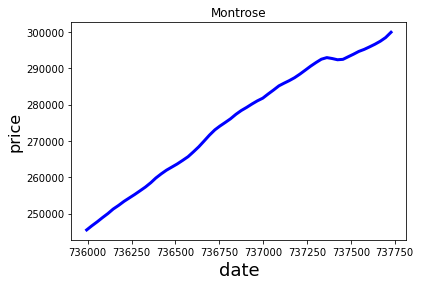

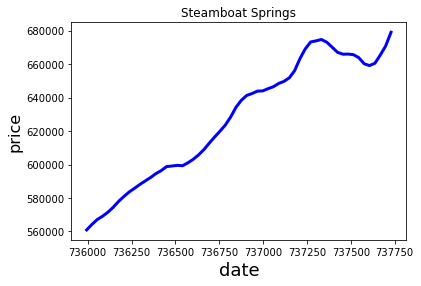

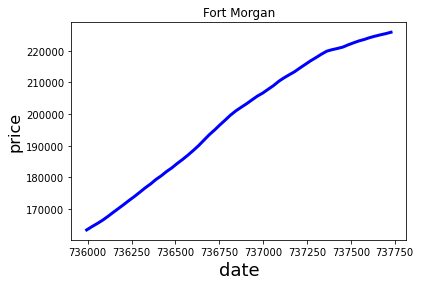

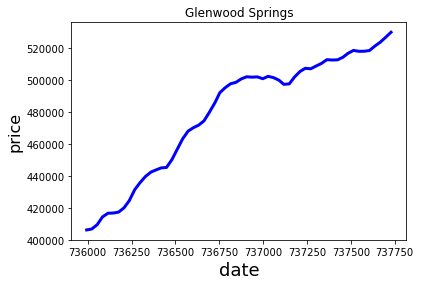

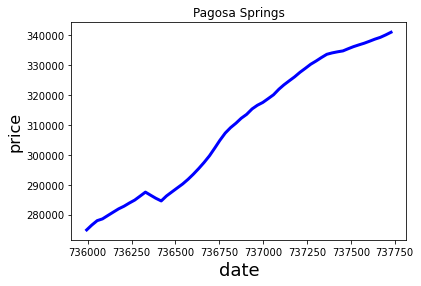

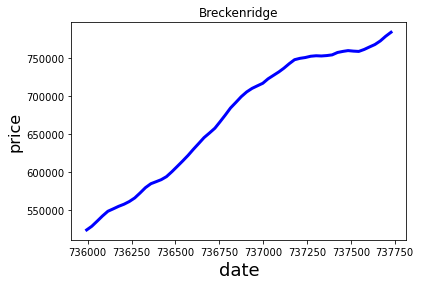

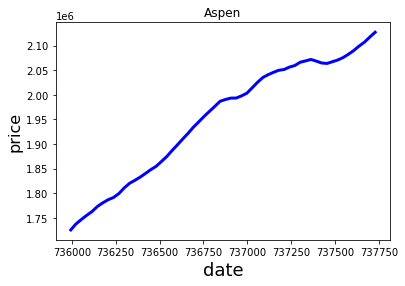

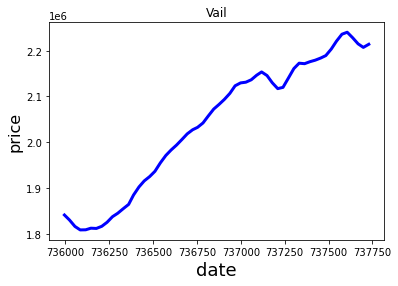

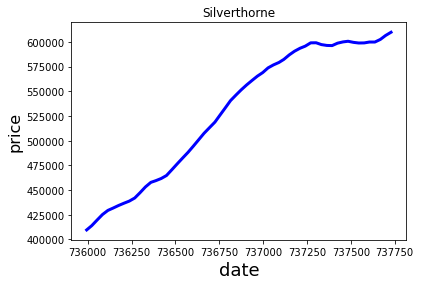

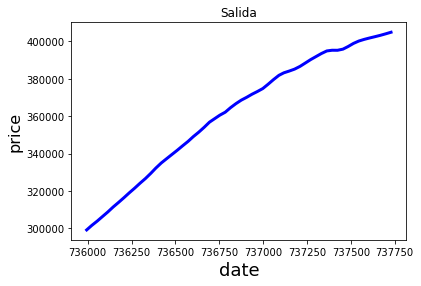

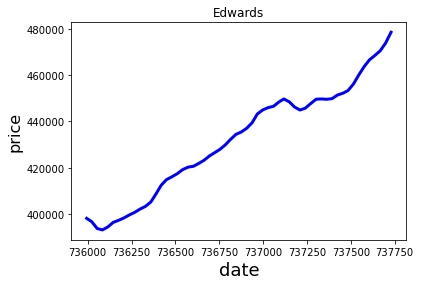

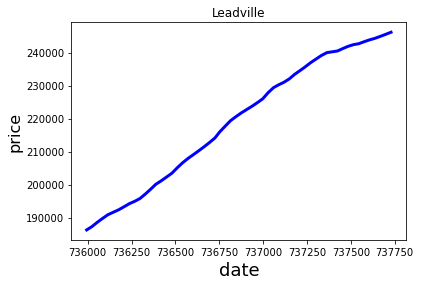

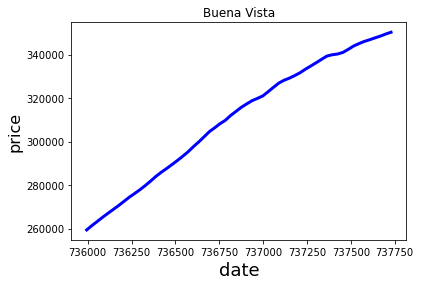

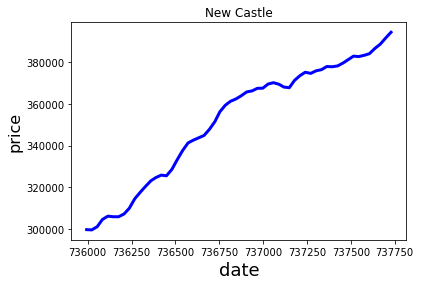

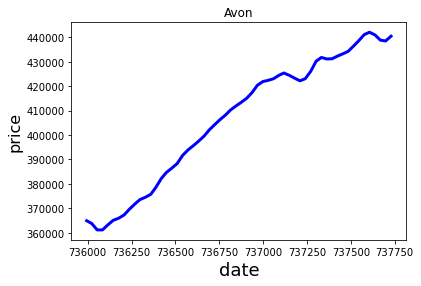

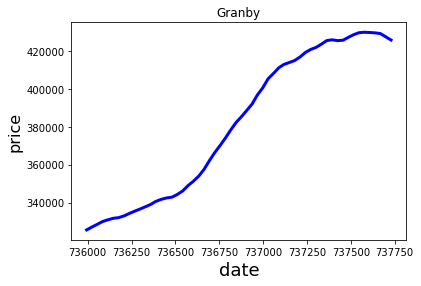

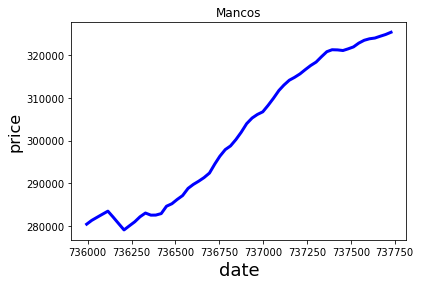

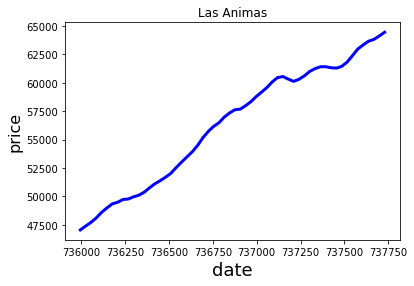

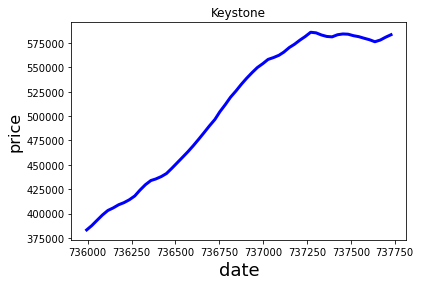

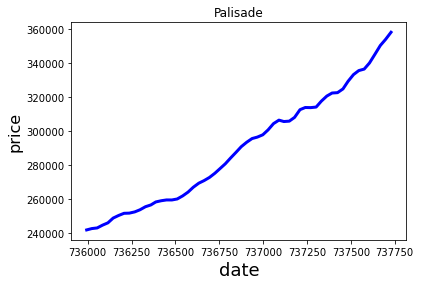

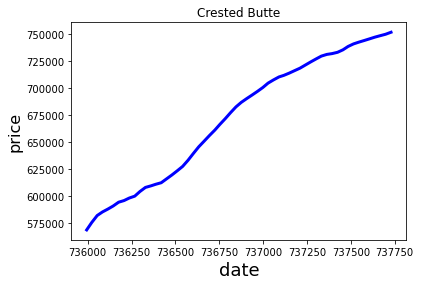

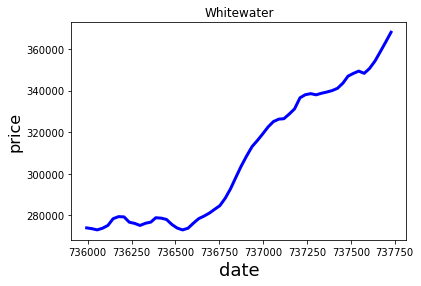

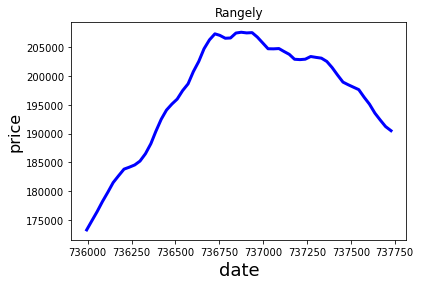

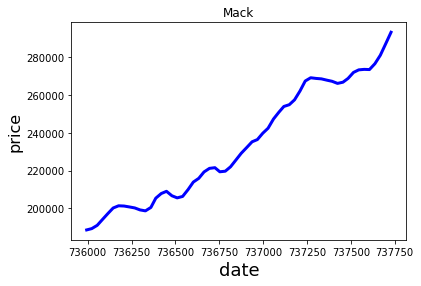

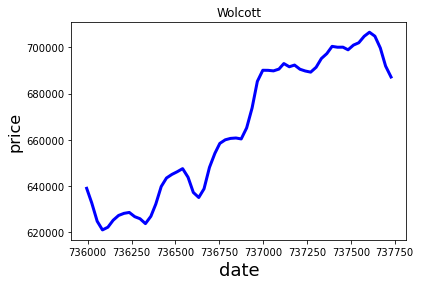

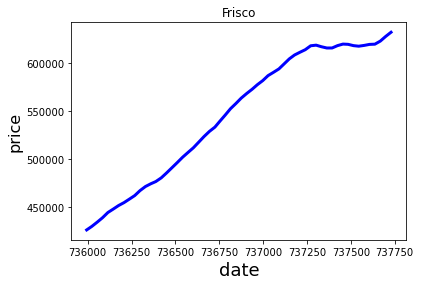

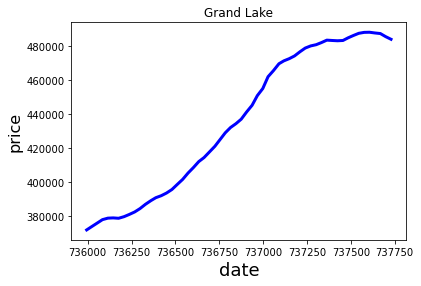

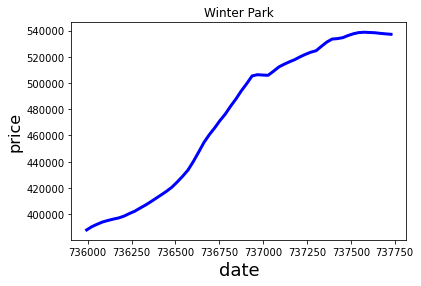

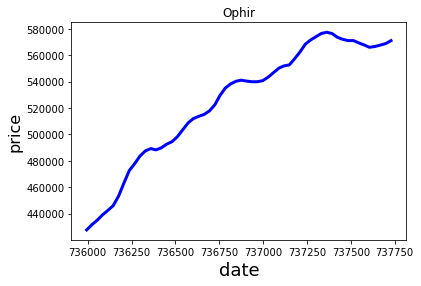

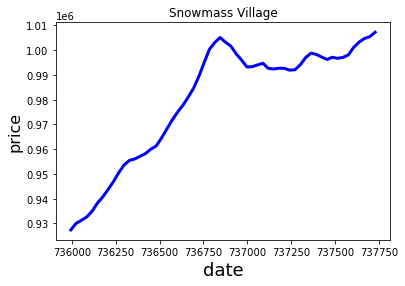

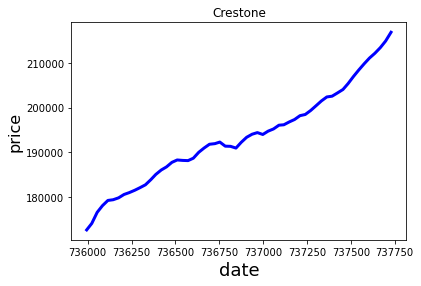

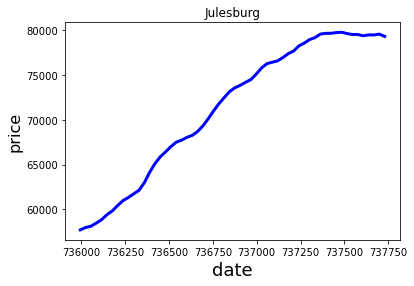

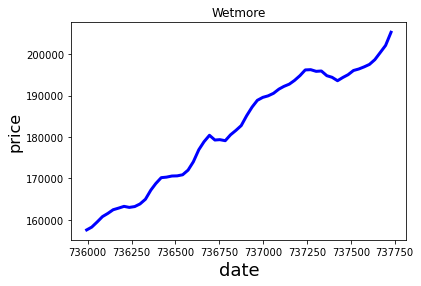

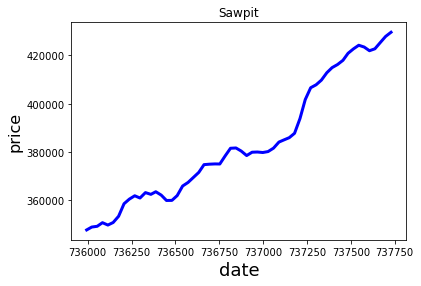

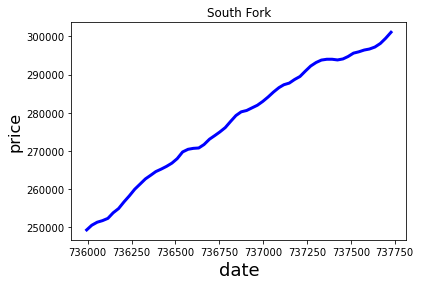

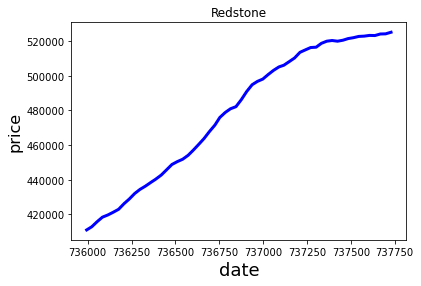

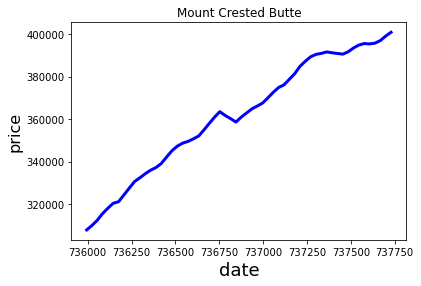

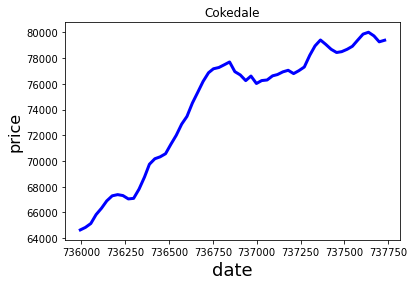

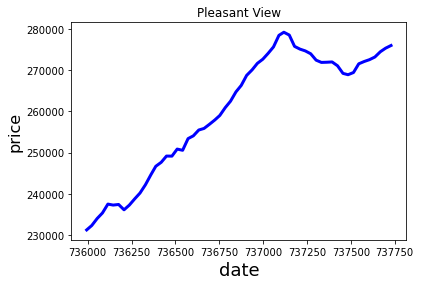

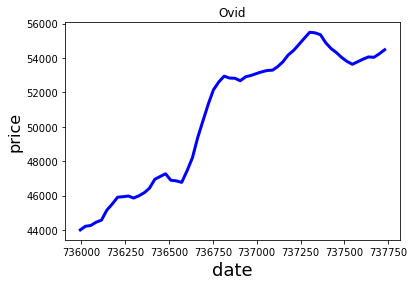

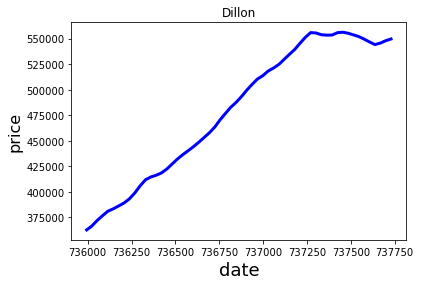

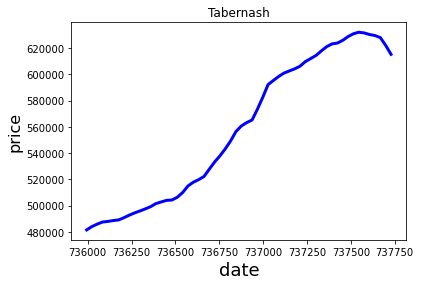

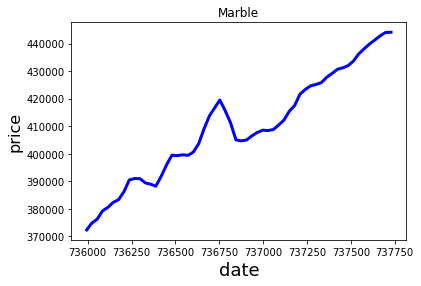

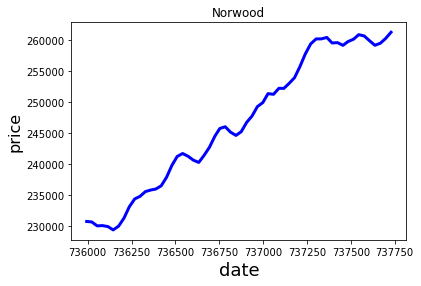

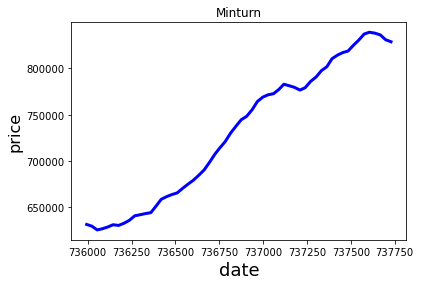

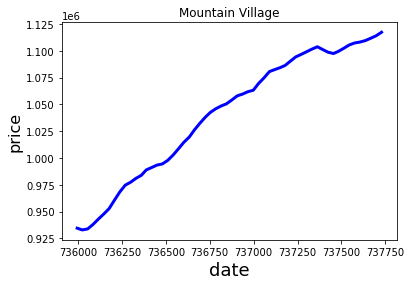

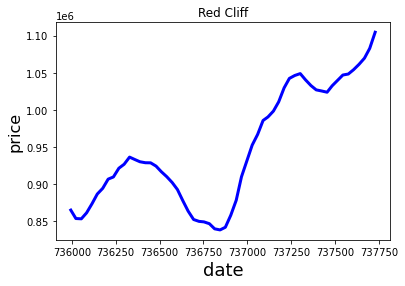

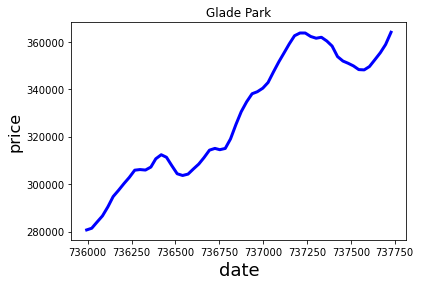

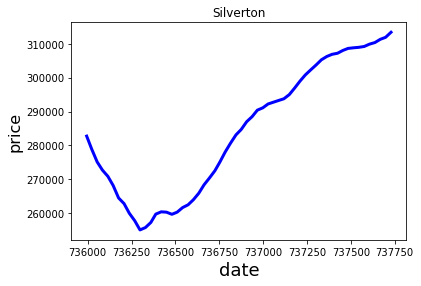

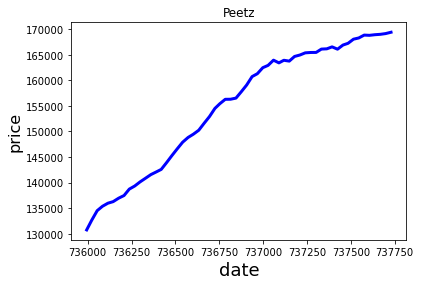

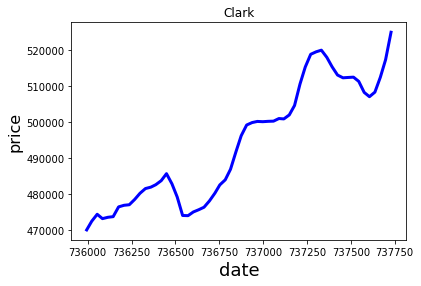

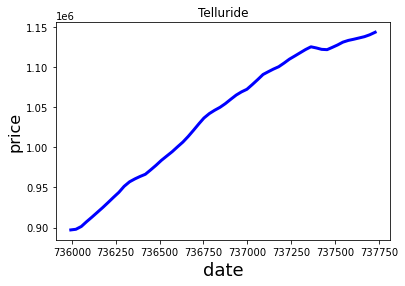

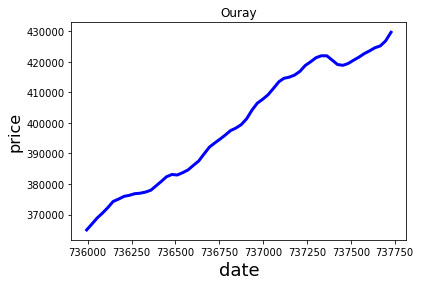

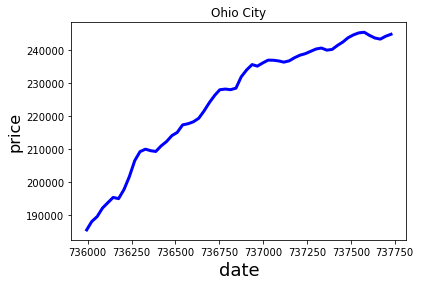

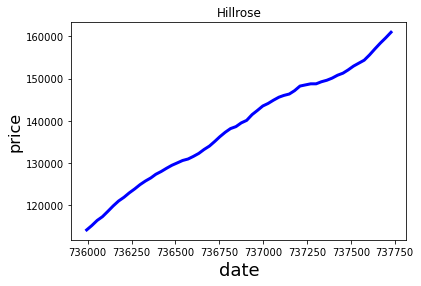

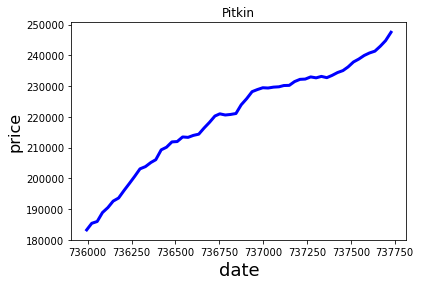

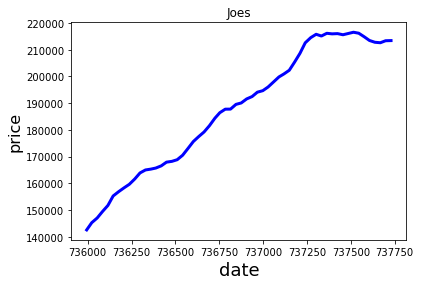

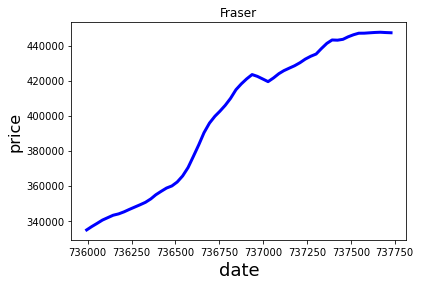

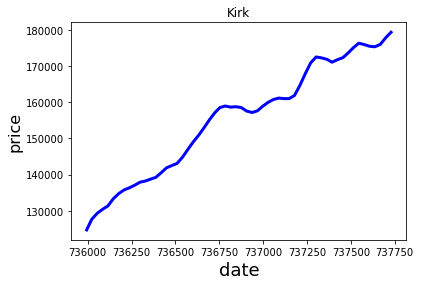

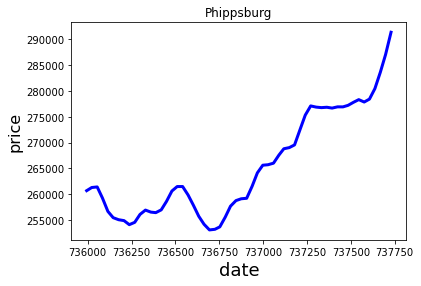

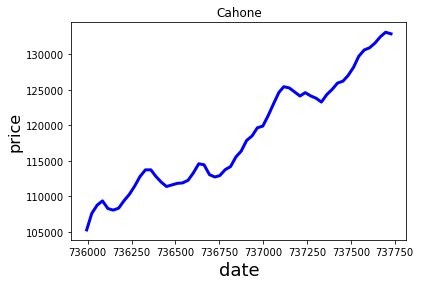

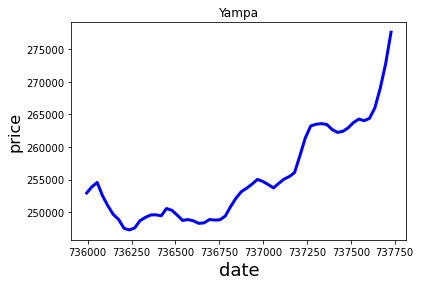

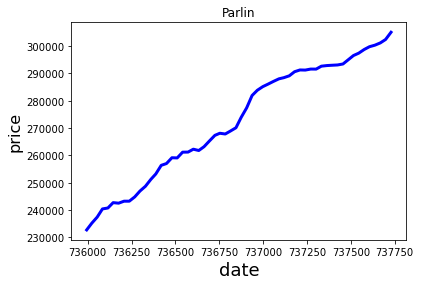

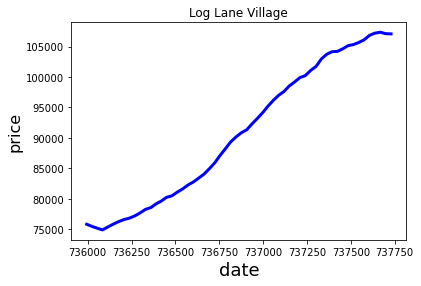

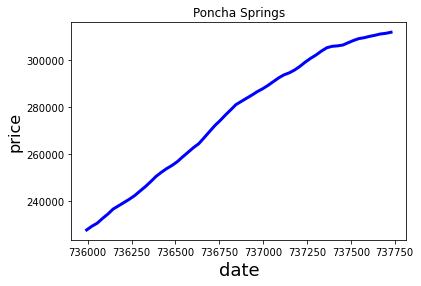

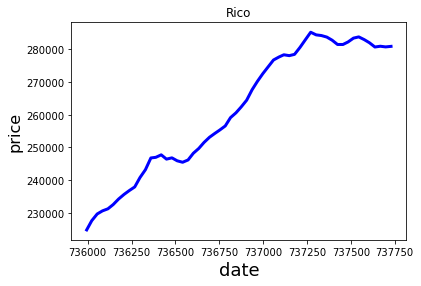

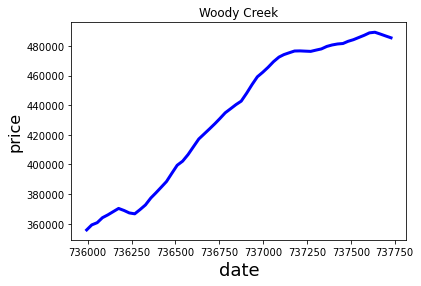

In [28]:


city_coef = []
city_inter = []
prediction_res = []
predict_date = ["2020-12-31"]

for i in cities:
    df = data2.loc[data2["city"] == i,:]
    Y = df.price.values
    X = df[["date"]].values
    reg = LinearRegression().fit(X, Y)
    city_coef.append(reg.coef_)
    city_inter.append(reg.intercept_)
    x_new = pd.to_datetime(predict_date)
    x_new = x_new.map(dt.datetime.toordinal)
    pred = reg.predict(x_new[0].reshape(-1, 1))
    prediction_res.append(pred)
    plt.plot(X, Y, color="blue", linewidth=3)
    plt.title(i, loc='center')
    #plt.xticks(range(len(df["date_org"].values)), df["date_org"].values, size='small')
    plt.xlabel('date', fontsize=18)
    plt.ylabel('price', fontsize=16)
    plt.savefig(f'{i}.png', dpi=200)
    plt.show()
    






In [15]:
plt.savefig(f'{i}.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
results = {'city': cities, 'coefficient': list(flatten(city_coef)) , 'intercept': city_inter, "predicted": list(flatten(prediction_res))}
results_df = pd.DataFrame(data=results)
results_df.to_csv("~/Desktop/results.csv")

In [ ]:
pd.set_option('display.max_rows', None)
results_df.sort_values('coefficient', ascending=False)

In [16]:
df

,city,date,price,date_org
3828,Woody Creek,735994,355835.0,2016-01-31
3829,Woody Creek,736023,359219.0,2016-02-29
3830,Woody Creek,736054,360715.0,2016-03-31
3831,Woody Creek,736084,364086.0,2016-04-30
3832,Woody Creek,736115,366001.0,2016-05-31
3833,Woody Creek,736145,368139.0,2016-06-30
3834,Woody Creek,736176,370329.0,2016-07-31
3835,Woody Creek,736207,368946.0,2016-08-31
3836,Woody Creek,736237,367293.0,2016-09-30
3837,Woody Creek,736268,366698.0,2016-10-31
